In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [20]:
from copy import copy
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from random import choice, sample, shuffle
import scipy.stats as stat

In [3]:
%matplotlib inline

In [4]:
def half_frame(sub, xaxis_label, yaxis_label, font_size = 15, padding = -0.02):
    """Formats frame, axes, and ticks for matplotlib made graphic with half frame."""

    # Format graph frame and tick marks
    sub.yaxis.set_ticks_position('left')
    sub.xaxis.set_ticks_position('bottom')
    sub.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', pad = 10,
                    labelsize = font_size)
    sub.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', labelsize = 10)
    for axis in ['bottom','left']:
        sub.spines[axis].set_linewidth(2)
        sub.spines[axis].set_position(("axes", padding))
    for axis in ['top','right']:
        sub.spines[axis].set_visible(False)

    # Format axes
    sub.set_xlabel(xaxis_label, fontsize = 1.6 * font_size)
    sub.set_ylabel(yaxis_label, fontsize = 1.6 * font_size)
    
    return


# Statistics

**Statistics is the science concerned with the study of the collection, analysis, interpretation, presentation, and organization of data.**

For concreteness let us consider two examples that hopefully you can relate to.

The US Census Bureau collects data on people residing in the US. The data includes measures such as the number of household occupants, their gender, their age, their familial relationships, their incomes, their education levels, and so on. The process for the data collection is called a **census** because the process aims to measure all individuals.

Colleges collect applications for their programs. The data collected includes standardized test scores, GPAs, essays, recommendation letters, and so on. No college is able to collect a census, so each must make decisions based on the **sample** of applicants. Each college is able to analyze a sample comprising a very small fraction of all students applying to college each year.  

+++

In order to learn more about these situations, let us consider the data we obtained when analyzing the sentiment score of the lines of Othelo and Iago.


In [6]:
with open('../Data/iago.json', 'r') as file1:
    iago_sentiment = json.load(file1)
    

with open('../Data/othello.json', 'r') as file1:
    othello_sentiment = json.load(file1)
    
N_othello = len(othello_sentiment)
N_iago = len(iago_sentiment)

print("Othello's data has {0} data points. \nIago's data has {1} data points.\n".format(N_othello, N_iago) )

print(iago_sentiment[:10])

Othello's data has 470 data points. 
Iago's data has 537 data points.

[1, 1, -3, 3, 1, 2, -3, 2, 3, 2]


### Descriptive statistics

The first step in the analysis of data is to to obtain a description that summarizes its statistical properties. There are a number of statistics (that is, measures that can be calculated for that data) that are particularly useful.

**Number of observations** is the number of data in the data set. In this case, the number of applicants for which we have GPA values.

**Minimum** is the smallest value in the data set.

**Maximum** is the largest value in the data set. For the GPA data, this is presumably 4.0.

**Support** (also called range) is the interval over which the values of the data set spread. Since GAPs are positive and must be no larger that 4, we know that the range must be a subset of the interval [0, 4]. Presumably, students will GPAs lower than 2 will not apply to a graduate program, so the support of our GPA data will likely be a subset of the interval [2, 4].

**Mode** is the most common value in the data set.  

**Median** is the value that is larger than half of all values and smaller than half of all values in the data set. The median is an example of a *percentile*.  Two other common percentiles are the *first quartile* and the *third quartile*.

**Sample Mean** (also called sample average) is the sum of all values divided by the number of observations.  The sample mean has the smallest distance to the set of all values in the sample.

**Standard deviation** is a measure of the spread around the sample mean for the values in the data set.

**Skewness** is a measure of the asymmetry of the values in the data set. If you divide the support of the data at the sample mean, and if one of the interval is longer than the other, than the data is skewed.

These quantities can all be easily obtained used methods already coded in `Scipy` and `Numpy`.


In [7]:
#import scipy.stats as stat
#import numpy as np

mode = float(stat.mode(othello_sentiment)[0])
print("The mode of the sample is {0:4.2f}".format(mode))

first_quartile = stat.scoreatpercentile(othello_sentiment, 25)
print("The first quartile of the sample is {0:4.2f}".format(first_quartile))

median = stat.scoreatpercentile(othello_sentiment, 50)
print("The median of the sample is {0:4.2f}".format(median))

third_quartile = stat.scoreatpercentile(othello_sentiment, 75)
print("The third quartile of the sample is {0:4.2f}".format(third_quartile))

skew = stat.skew(othello_sentiment)
print("The skewness of the sample is {0:5.3f}".format(skew))

The mode of the sample is 2.00
The first quartile of the sample is -2.00
The median of the sample is 1.00
The third quartile of the sample is 2.00
The skewness of the sample is -0.415


In [9]:
results = stat.describe(othello_sentiment)
print(results)

print()

results = stat.describe(iago_sentiment)
print(results)

# Let's prettify these results so that they are easier to read by humans
# You code here!


DescribeResult(nobs=470, minmax=(-4, 4), mean=0.40851063829787232, variance=5.120609717370594, skewness=-0.41543139442792626, kurtosis=-1.3060163694576852)

DescribeResult(nobs=537, minmax=(-4, 4), mean=0.32774674115456237, variance=4.9073070402179058, skewness=-0.29978164467913276, kurtosis=-1.4307035152922654)


### Plot the distribution

While descriptive statistics are very useful, their calculation involves the loss of a lot of information on the data.  Obtaining an histogram of the data values gives a much more accurate picture of the statistical properties of the data *as long as the histogram is calculated properly*. 

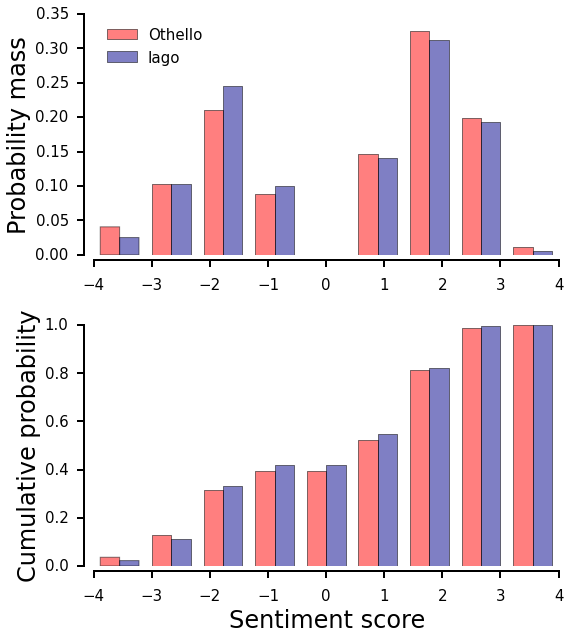

In [13]:
fig = plt.figure( figsize = (8, 9) )
my_font_size = 15

sub1 = fig.add_subplot(2,1,1)
sub2 = fig.add_subplot(2,1,2)

half_frame(sub1, "", "Probability mass", font_size = my_font_size)
half_frame(sub2, "Sentiment score", "Cumulative probability", font_size = my_font_size)

# Calculate and plot histogram
#
sub1.hist([othello_sentiment, iago_sentiment], 9, normed = 1, color = ['r', 'darkblue'], rwidth = 0.75, alpha = 0.5, 
          histtype = "bar", label = ['Othello', 'Iago'], cumulative = False)

sub2.hist([othello_sentiment, iago_sentiment], 9, normed = 1, color = ['r', 'darkblue'], rwidth = 0.75, alpha = 0.5, 
          histtype = "bar", label = ['Othello', 'Iago'], cumulative = True)

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.tight_layout()

plt.show()

What question we may want to answer with our data is whether Othello and Iago express similar levels of sentiment in their speeches.  Looking at the probability mass function, one could be tempted to say maybe... The cumulative probability plot, however, suggest that probably not.  How do we decide?  


## Inferential statistics

The goal of descriptive statistics is to gain sufficient insight into our data to enable us to develop hypotheses about what process generated the data or whether different samples were drawn from the same distribution. **These hypotheses are called null models**.

The process can be a physical model, which may or may not predict the value of the parameters necessary to describe the statistical properties of the data. The process can also be a statistical model.

Using inferential statistics, one determines whether a given null hypothesis is consistent with the data. Let's test the null hypothesis using a few standard methods.

In [12]:
# Using t-test

t, p = stat.ttest_ind(othello_sentiment, iago_sentiment, equal_var = False)
print('t test: \t t =  {0:6.4f}  \t p = {1:6.4f}'.format(t, p) )

t test: 	 t =  0.5706  	 p = 0.5684


In [14]:
# Using Kolmogorov-Smirnov test

D, p = stat.ks_2samp(othello_sentiment, iago_sentiment)
print('KS 2 sample test: \t  D =  {0:6.4f}  \t p = {1:6.4f}'.format(D, p) )

KS 2 sample test: 	  D =  0.0272  	 p = 0.9916


In [27]:
# Using chi_square test
# http://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/chi2samp.htm

hist_othello, edges = np.histogram(othello_sentiment, bins = 9, density = False)
hist_iago, edges = np.histogram(iago_sentiment, bins = 9, density = False)
print(hist_othello)
print(hist_iago)

# Calculate chisquared statistic
chisquared = 0
factor1 = math.sqrt(N_iago/N_othello)
factor2 = math.sqrt(N_othello/N_iago)
for i in range(len(hist_othello)):
    if hist_othello[i] != 0:
        chisquared += (factor1 * hist_othello[i] - factor2 * hist_iago[i])**2 / ((hist_othello[i] + hist_iago[i]))

p = stat.chisqprob(chisquared, len(hist_othello))
print('chi^2 goodness of fit test: \t chi^2 =  {0:6.4f}  \t p = {1}'.format(chisquared, p) )
chisquared_data = chisquared

[ 17  43  88  37   0  61 136  83   5]
[ 12  49 117  48   0  67 149  92   3]
chi^2 goodness of fit test: 	 chi^2 =  4.1771  	 p = 0.8993722457702136


Ok!  So all three tests suggest that the differences are not significant. Should we trust these results, though?

If we think about it, the `t-test` and the `KS` are **clearly** not good tests for these data. The data is bimodal (there goes the `t-test`) and discrete/categorical  (there goes the `KS test`).  What about the $\chi^2$ test? How do we know whether its assumptions are fullfilled?

The $\chi^2$ test requires three conditions to be satisfied: 1) the data is obtained by simple random sampling, 2) the data is categorical, and 3) the expected number of observations for every category is at least 5.

Conditions 2 and 3 are clearly fullfilled. Condition 1 is a little trickier. We are not really doing any sampling. We are getting all the data that there is to get except for the possibility that the play was altered during or after its creation and that the removed parts were select in a biased manner... 

What do we do in case it is really difficult to figure out whether the conditions of a test are fullfilled?

# Bootstrap methods

That is where bootstrapping approaches can help!!

We want to test the null hypothesis that the two samples are drawn from the same distribution.  Well, if both samples are drawn from the same distribution, we can put all the data together into a single sample.  And then we can use that combined sample, to generate pretty much an unlimited number of synthetic samples with the same sizes as our data.

Let's do that!

In [21]:
# Generate combined data set

joint_sample = copy(othello_sentiment)
joint_sample.extend(iago_sentiment)
print(len(joint_sample))

1007


In [22]:
# Generate synthetic data sets

othello_synthetic = sample(joint_sample, N_othello)
iago_synthetic = sample(joint_sample, N_iago)

In [24]:
# Use t-test to check differences in average

t, p = stat.ttest_ind(othello_sentiment, iago_sentiment, equal_var = False)
print('ttest_ind - data: \t t =  {0:6.4f}'.format(t) )

t, p = stat.ttest_ind(othello_synthetic, iago_synthetic, equal_var = False)
print('ttest_ind - synthetic: \t t =  {0:6.4f}'.format(t) )


ttest_ind - data: 	 t =  0.5706
ttest_ind - synthetic: 	 t =  -0.2843


In [ ]:
# Write code to perform these analyses repeatedly

N_replicates = 5
t_statistic = []
D_statistic = []
chisquared_statistic = []


Once, we have our results, we can plot them

In [25]:
#answer
N_replicates = 500
t_statistic = []
D_statistic = []
chisquared_statistic = []
for i in range(N_replicates):
    othello_synthetic = sample(joint_sample, N_othello)
    iago_synthetic = sample(joint_sample, N_iago)
    
    t, p = stat.ttest_ind(othello_synthetic, iago_synthetic, equal_var = False)
    t_statistic.append(t)
    
    D, p = stat.ks_2samp(othello_synthetic, iago_synthetic)
    D_statistic.append(D)
    
    chisquared = 0
    hist_othello, edges = np.histogram(othello_synthetic, bins = 9, density = False)
    hist_iago, edges = np.histogram(iago_synthetic, bins = 9, density = False)
    factor1 = math.sqrt(N_iago/N_othello)
    factor2 = math.sqrt(N_othello/N_iago)
    for i in range(len(hist_othello)):
        if hist_othello[i] != 0:
            chisquared += (factor1 * hist_othello[i] - factor2 * hist_iago[i])**2 / ((hist_othello[i] + hist_iago[i]))
    
    chisquared_statistic.append(chisquared)


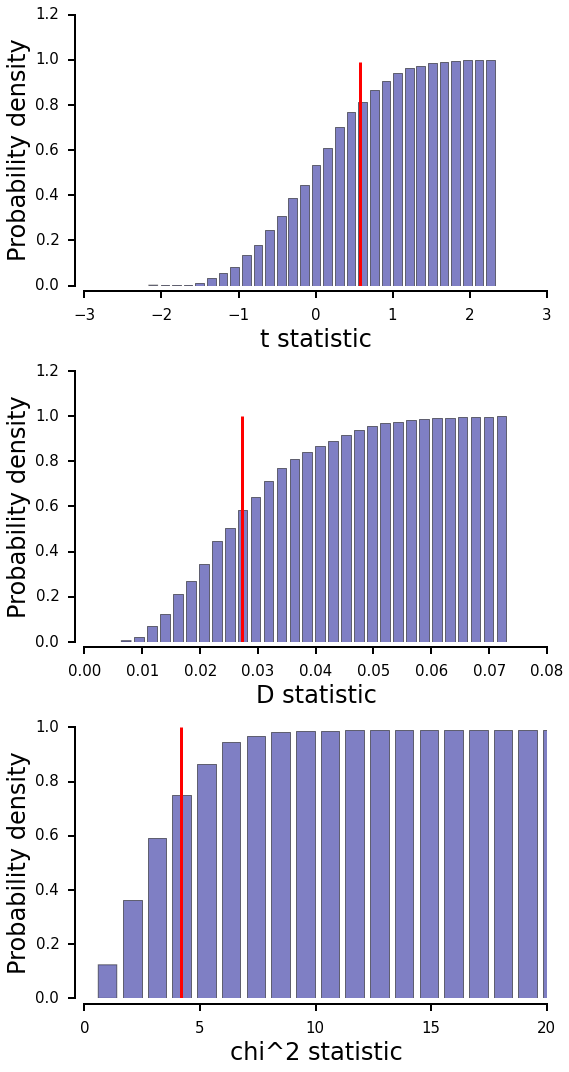

In [28]:
fig = plt.figure( figsize = (8, 15) )
my_font_size = 15

sub1 = fig.add_subplot(3,1,1)
sub2 = fig.add_subplot(3,1,2)
sub3 = fig.add_subplot(3,1,3)

half_frame(sub1, "t statistic", "Probability density", font_size = my_font_size)
half_frame(sub2, "D statistic", "Probability density", font_size = my_font_size)
half_frame(sub3, "chi^2 statistic", "Probability density", font_size = my_font_size)

# Calculate and plot histogram
#
sub1.hist(t_statistic, 30, normed = 1, color = 'darkblue', rwidth = 0.75, alpha = 0.5, 
          histtype = "bar", cumulative = True)

t, p = stat.ttest_ind(othello_sentiment, iago_sentiment, equal_var = False)
sub1.vlines(t, ymin = 0, ymax = 0.99, lw = 3, color = "red", label = "data")

sub2.hist(D_statistic, 30, normed = 1, color = 'darkblue', rwidth = 0.75, alpha = 0.5, 
          histtype = "bar", cumulative = True)

D, p = stat.ks_2samp(othello_sentiment, iago_sentiment)
sub2.vlines(D, ymin = 0, ymax = 1, lw = 3, color = "red", label = "data")


sub3.hist(chisquared_statistic, 200, normed = 1, color = 'darkblue', rwidth = 0.75, alpha = 0.5, 
          histtype = "bar", cumulative = True)

sub3.vlines(chisquared_data, ymin = 0, ymax = 1, lw = 3, color = "red", label = "data")
sub3.set_xlim([0,20])

# Format legend
#sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.tight_layout()

plt.show()

We see that the differences between the sentiment levels of Iago's and Othello's speech are not statistically significant.  It would be interesting to compare their speeches with those uttered by characters from other plays...